In [142]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [143]:
# Import the numpy and pandas packages

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [144]:
IMDb_path= Path.home().joinpath('Jupyter_files', 'IIIT-B material', 'IMDb Movie Assignment')

movies = pd.read_csv(IMDb_path.joinpath('Movie_Assignment_Data.csv'), skipinitialspace=True)
movies= movies.apply(func=lambda x: x.str.strip() if x.dtype=='object' else x)

-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [145]:
# Write your code for inspection here
print(movies.shape)
print(movies.columns)
print(movies.info())

(5043, 28)
Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration        

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [146]:
# Write your code for column-wise null count here

#movies.isnull().sum()
movies.isnull().sum(axis='rows')

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [147]:
# Write your code for row-wise null count here

movies.isnull().sum(axis='columns')

0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [148]:
# Write your code for column-wise null percentages here
#Taking percentages of column nulls on total nulls

total_nulls= movies.isnull().sum().sum()
#print(total_nulls)
round(((movies.isnull().sum(axis='rows')/total_nulls)*100),2)

color                         0.70
director_name                 3.85
num_critic_for_reviews        1.85
duration                      0.56
director_facebook_likes       3.85
actor_3_facebook_likes        0.85
actor_2_name                  0.48
actor_1_facebook_likes        0.26
gross                        32.77
genres                        0.00
actor_1_name                  0.26
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.85
facenumber_in_poster          0.48
plot_keywords                 5.67
movie_imdb_link               0.00
num_user_for_reviews          0.78
language                      0.44
country                       0.19
content_rating               11.23
budget                       18.24
title_year                    4.00
actor_2_facebook_likes        0.48
imdb_score                    0.00
aspect_ratio                 12.19
movie_facebook_likes          0.00
dtype: float64

-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [149]:
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations 
movies.drop(['color', 'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes',
               'actor_2_name', 'cast_total_facebook_likes', 'actor_3_name', 'duration','facenumber_in_poster',
                'content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'], axis='columns', inplace=True)
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,NaN,NaN,NaN,NaN,7.1,0


-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

In [150]:
# Write your code for dropping the rows here

#Calculating the total values of Nulls in the movies dataframe
null_total= movies.isnull().sum().sum()

#Calculating percentage of null values per column, and storing it in a Series 
data=(movies.isnull().sum()/null_total)*100

drop_list=[]

#Iterating through the series and storing the names of the columns having more than 5% null values in a list drop_list
for key,value in data.items():
    if value>5:
        drop_list.append(key)
        
#Dropping the rows from movies where column name is in drop_list list
movies.dropna(subset=drop_list,inplace=True)

In [151]:
movies.shape

(3891, 13)

-  ### Subtask 2.4: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [152]:
# Write your code for filling the NaN values in the 'language' column here

movies['language'].fillna('English', inplace=True)
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000


-  ### Subtask 2.5: Check the number of retained rows

You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [153]:
# Write your code for checking number of retained rows here

#Number of rows in original dataframe = 5043

percent_of_retained_rows= ((movies.shape[0])/5043)*100
print(percent_of_retained_rows)

77.15645449137418


**Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [154]:
# Write your code for unit conversion here

movies[['budget','gross']]= movies[['budget','gross']]/1000000

-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [155]:
# Write your code for creating the profit column here
movies['Profit']= movies['gross']-movies['budget']

In [156]:
# Write your code for sorting the dataframe here
movies.sort_values('Profit', ascending=False ,inplace=True)

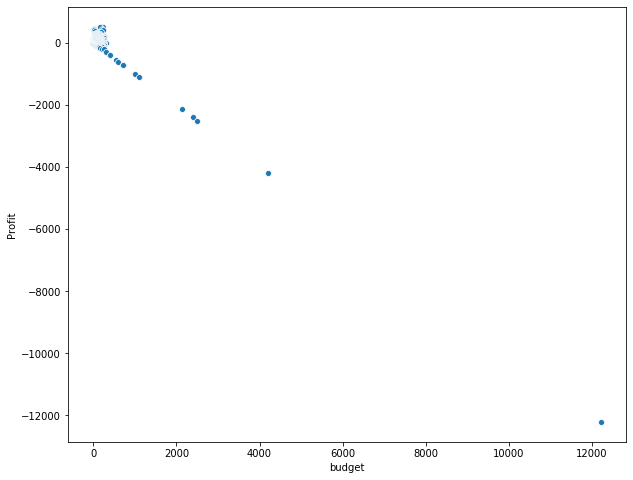

In [157]:
# Write code for profit vs budget plot here

plt.figure(figsize=(10,8))
sns.scatterplot(x='budget', y='Profit', data=movies)
plt.show()

#Can see outliers are present- Yes

In [158]:
#top10 = # Write your code to get the top 10 profiting movies here

top10= movies.head(10)
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459
794,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
17,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061


-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have noticed a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`. Note that the same `movie_title` can be there in different languages. 

In [159]:
# Write your code for dropping duplicate values here
movies.drop_duplicates(keep='first',inplace=True)

In [160]:
# Write code for repeating subtask 2 here

movies.sort_values('Profit', ascending=False ,inplace=True)
top_10= movies.head(10)
top_10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.449459
794,Joss Whedon,703.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061
439,Gary Ross,673.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,329.999255


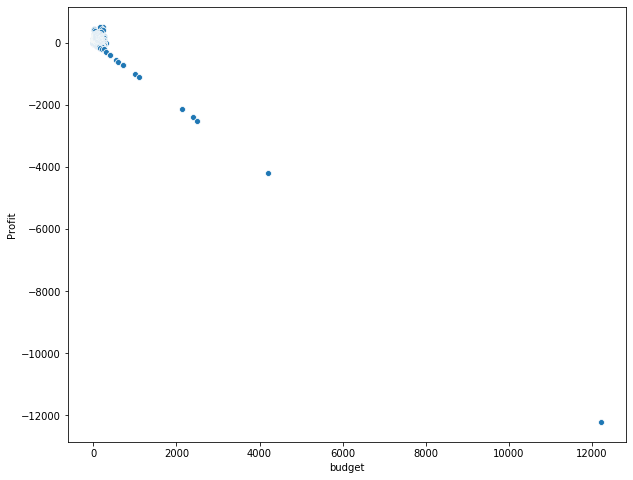

In [161]:
# Write code for profit vs budget plot here

plt.figure(figsize=(10,8))
sns.scatterplot(x='budget', y='Profit', data=movies)
plt.show()

**Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [174]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'

#Dropping all rows with num_voted_users less than 25000
IMDb_Top_250= movies.drop(movies[movies['num_voted_users'] < 25000].index)

#Sorting movies1 df in descending order of imdb_score and keeping only the first 250 rows
IMDb_Top_250.sort_values('imdb_score',ascending=False, inplace=True)
IMDb_Top_250= IMDb_Top_250.head(250)

# Creating a numpy array of numbers 1 to number of rows in IMDb_Top_250
Rank= np.arange(1,IMDb_Top_250.shape[0]+1,1)

# # Assigning above created numpy array as a column in the IMDb_Top_250
IMDb_Top_250['Rank']= Rank

IMDb_Top_250.head(10)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Rank
1937,Frank Darabont,199.0,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144.0,English,25.0,1994.0,9.3,108000,3.341469,1
3466,Francis Ford Coppola,208.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238.0,English,6.0,1972.0,9.2,43000,128.821952,2
2837,Francis Ford Coppola,149.0,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650.0,English,13.0,1974.0,9.0,14000,44.300000,3
66,Christopher Nolan,645.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.316061,4
339,Peter Jackson,328.0,377.019252,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189.0,English,94.0,2003.0,8.9,16000,283.019252,5
1874,Steven Spielberg,174.0,96.067179,Biography|Drama|History,Liam Neeson,Schindler's List,865020,1273.0,English,22.0,1993.0,8.9,41000,74.067179,6
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780.0,Italian,1.2,1966.0,8.9,20000,4.900000,7
3355,Quentin Tarantino,215.0,107.930000,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,2195.0,English,8.0,1994.0,8.9,45000,99.930000,8
97,Christopher Nolan,642.0,292.568851,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,2803.0,English,160.0,2010.0,8.8,175000,132.568851,9
683,David Fincher,315.0,37.023395,Drama,Brad Pitt,Fight Club,1347461,2968.0,English,63.0,1999.0,8.8,48000,-25.976605,10


In [175]:
#Top_Foreign_Lang_Film = # Write your code to extract top foreign language films from 'IMDb_Top_250' here

Top_Foreign_Lang_Film=IMDb_Top_250.loc[(IMDb_Top_250['language']!='English'),:]
Top_Foreign_Lang_Film

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,Rank
4498,Sergio Leone,181.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780.0,Italian,1.200000,1966.0,8.9,20000,4.900000,7
4029,Fernando Meirelles,214.0,7.563397,Crime|Drama,Alice Braga,City of God,533200,749.0,Portuguese,3.300000,2002.0,8.7,28000,4.263397,15
4747,Akira Kurosawa,153.0,0.269061,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596.0,Japanese,2.000000,1954.0,8.7,11000,-1.730939,17
2373,Hayao Miyazaki,246.0,10.049886,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902.0,Japanese,19.000000,2001.0,8.6,28000,-8.950114,26
4921,Majid Majidi,46.0,0.925402,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130.0,Persian,0.180000,1997.0,8.5,0,0.745402,43
4259,Florian Henckel von Donnersmarck,215.0,11.284657,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407.0,German,2.000000,2006.0,8.5,39000,9.284657,46
1329,S.S. Rajamouli,44.0,6.498000,Action|Adventure|Drama|Fantasy|War,Tamannaah Bhatia,Baahubali: The Beginning,62756,410.0,Telugu,18.026148,2015.0,8.4,21000,-11.528148,47
4659,Asghar Farhadi,354.0,7.098492,Drama|Mystery,Shahab Hosseini,A Separation,151812,264.0,Persian,0.500000,2011.0,8.4,48000,6.598492,49
1298,Jean-Pierre Jeunet,242.0,33.201661,Comedy|Romance,Mathieu Kassovitz,Amélie,534262,1314.0,French,77.000000,2001.0,8.4,39000,-43.798339,52
4105,Chan-wook Park,305.0,2.181290,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809.0,Korean,3.000000,2003.0,8.4,43000,-0.818710,57


**Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`.  Incase of a tie in IMDb score between two directors, sort them alphabetically. 

In [176]:
# Write your code for extracting the top 10 directors here

director= movies.groupby('director_name') #grouping by director names

#Taking mean of imdb_score for each director, and sorting in descending order to get directors with highest mean first
#Converting the groupby to DataFrame object, taking only the first 10 values from the result
top10directors= pd.DataFrame((director['imdb_score'].mean().sort_values(ascending=False)))[0:10]
top10directors

,imdb_score
director_name,
Charles Chaplin,8.600000
Tony Kaye,8.600000
Ron Fricke,8.500000
Damien Chazelle,8.500000
Majid Majidi,8.500000
Alfred Hitchcock,8.500000
Sergio Leone,8.433333
Christopher Nolan,8.425000
Asghar Farhadi,8.400000


In [ ]:
#Also got movies dataframe for above top10 directors
#concatenating rows from movies1 dataframe where director_name matches director name from top10directors
#using iterrows to itereate through dataframe values
directors= pd.concat([pd.DataFrame(movies1.loc[movies1['director_name'] == key,:]) for (key,value) in top10directors.iterrows()],ignore_index=True)

#dropping duplicates director names from directors dataframe
directors.drop_duplicates(subset=('director_name'),keep='first',inplace=True)

**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [183]:
# Write your code for extracting the first two genres of each movie here

#Creating a temporary new column in dataframe containing a list of all genres listed for a movie
movies['genres_split'] = movies['genres'].apply(lambda x: x.split('|'))

#Creating new columns based on the genres_split column
movies['genre_1']= [value[0] for key,value in movies['genres_split'].items()]
movies['genre_2']= ([value[1] if len(value)>1 else value[0] for key,value in movies['genres_split'].items()])

# #Dropping the genres_split column that was temporary
movies.drop('genres_split',axis='columns',inplace=True)

movies.head(3)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,genre_1,genre_2
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847,Action,Adventure
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271,Action,Adventure
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302,Drama,Romance


In [185]:
movies_by_segment = movies.groupby(['genre_1','genre_2'])

In [186]:
#Top 5 combinations of genres based on mean gross values
PopGenre = pd.DataFrame(((movies_by_segment['gross']).mean().sort_values(ascending=False)).head(5))
PopGenre

gross
genre_1   genre_2              
Family    Sci-Fi     434.949459
Adventure Sci-Fi     228.627758
          Family     118.919540
          Animation  116.998550
Action    Adventure  109.595465

**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.

In [188]:
# Write your code for creating three new dataframes here

Meryl_Streep = pd.DataFrame(movies.loc[movies['actor_1_name']=='Meryl Streep',:])

In [189]:
Leo_Caprio = pd.DataFrame(movies.loc[movies['actor_1_name']=='Leonardo DiCaprio',:])

In [190]:
Brad_Pitt = pd.DataFrame(movies.loc[movies['actor_1_name']=='Brad Pitt',:])

In [191]:
# Write your code for combining the three dataframes here
Combined= pd.concat([Meryl_Streep,Leo_Caprio,Brad_Pitt], ignore_index=True)

In [192]:
# Write your code for grouping the combined dataframe here
actor_1_name_grouping= Combined.groupby(['actor_1_name'])

In [193]:
# Write the code for finding the mean of critic reviews and audience reviews here
actor_1_name_grouping[['num_critic_for_reviews','num_user_for_reviews']].mean().sort_values(by=['num_critic_for_reviews','num_user_for_reviews'],ascending=False)

,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Leonardo DiCaprio,330.190476,914.476190
Brad Pitt,245.000000,742.352941
Meryl Streep,181.454545,297.181818


**Checkpoint 6:** `Leonardo` has aced both the lists!

Observe the change in number of voted users over decades using a bar chart. Create a column called decade which represents the decade to which every movie belongs to. For example, the title_year year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column decade, group it by decade and find the sum of users voted in each decade. Store this in a new data frame called df_by_decade.

In [194]:
# Write the code for calculating decade here

movies['decade']=(movies['title_year']-movies['title_year']%10).astype('int')
movies.head(3)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,Profit,genre_1,genre_2,decade
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.505847,Action,Adventure,2000
29,Colin Trevorrow,644.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.177271,Action,Adventure,2010
26,James Cameron,315.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.672302,Drama,Romance,1990


In [196]:
# Write your code for creating the data frame df_by_decade here

movies= movies.sort_values('decade')
df_by_decade= pd.DataFrame(movies.groupby('decade')['num_voted_users'].sum())
df_by_decade

,num_voted_users
decade,
1920,116392
1930,804839
1940,230838
1950,678336
1960,2983442
1970,8524102
1980,19987476
1990,69735679
2000,170908676


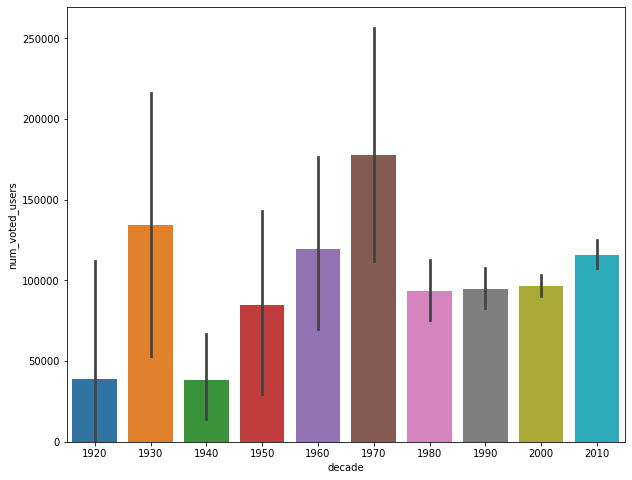

In [197]:
# Write your code for plotting number of voted users vs decade

plt.figure(figsize=(10,8))
sns.barplot(x=movies['decade'], y=movies['num_voted_users'])
plt.show()